<a href="https://colab.research.google.com/github/aanchalkhanna72/AML/blob/main/Cosine_and_Euclidean_Metrics_in_HClust_PPP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

E22027 Prathmesh Morane, E22001 Aanchal Khanna

#Question 2
Read the context carefully:
Thus far, in all cluster analysis examples we have used Euclidean distance as the dissimilarity measure. But sometimes other dissimilarity measures might be preferred. For example, correlation-based distance considers two observations to be similar if their features are highly correlated, even though the observed values may be far apart in terms of Euclidean distance. This is an unusual use of correlation, which is normally computed between variables; here it is computed between the observation profiles for each pair of observations. The following figure illustrates the difference between Euclidean and correlation-based distance. 


In [251]:
#import libraries
import pandas as pd

In [315]:
#We take 10 customers, with 10 features each of 10 different products they are buying
cust={'Customer':[],'Soap':[],'Shampoo':[],'Face_Wash':[],'Chips':[],'Rice':[]}

In [316]:
#creating an empty dataframe
cust=pd.DataFrame(cust)
cust

,Customer,Soap,Shampoo,Face_Wash,Chips,Rice


In [317]:
#creating customer indexes
cust["Customer"]=['C0','C1','C2','C3','C4','C5','C6']

In [318]:
#list wise customers (to manipulate data)
C0=[10,15,3,20,15]
C1=[2,4,15,0,3]
C2=[5,2,5,12,15]
C3=[12,7,1,12,6]
C4=[30,35,50,30,30]
C5=[4,11,0,2,2]
C6=[35,40,30,50,46]

In [319]:
#inserting rows into the dataframe
cust["Soap"]=[10,2,5,12,30,4,35]
cust["Shampoo"]=[15,4,2,7,35,11,40]
cust["Face_Wash"]=[3,15,5,1,50,0,30]
cust["Chips"]=[20,0,12,12,30,2,50]
cust["Rice"]=[15,3,15,6,30,2,46]

In [321]:
#transposing  the matrix to plot graph
cust1= cust.iloc[:, 1:6].T
cust1


,0,1,2,3,4,5,6
Soap,10,2,5,12,30,4,35
Shampoo,15,4,2,7,35,11,40
Face_Wash,3,15,5,1,50,0,30
Chips,20,0,12,12,30,2,50
Rice,15,3,15,6,30,2,46


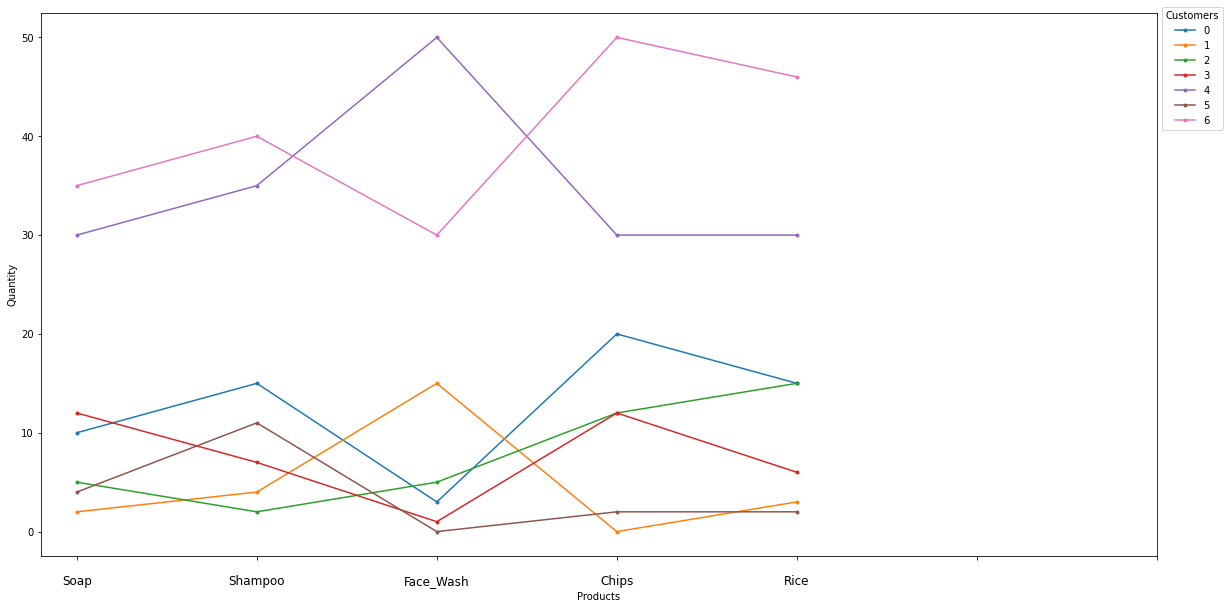

In [322]:
#plotting the customer wise purchases
ax = cust1.plot(xlabel='Products', ylabel='Quantity', figsize=(20,10), marker='.', xticks=cust.index.tolist())
ax.legend(title='Customers', bbox_to_anchor=(1, 1.02), loc='upper left')
ax.tick_params(axis='x', which='major', pad=15)
ax.tick_params(axis='x',labelsize='large')

In [323]:
#checking
cust

,Customer,Soap,Shampoo,Face_Wash,Chips,Rice
0,C0,10,15,3,20,15
1,C1,2,4,15,0,3
2,C2,5,2,5,12,15
3,C3,12,7,1,12,6
4,C4,30,35,50,30,30
5,C5,4,11,0,2,2
6,C6,35,40,30,50,46


In [326]:
#dropping customer index for further analysis
cust=cust.drop(["Customer"],axis=1)

In [335]:
#checking
cust

,Soap,Shampoo,Face_Wash,Chips,Rice
0,10,15,3,20,15
1,2,4,15,0,3
2,5,2,5,12,15
3,12,7,1,12,6
4,30,35,50,30,30
5,4,11,0,2,2
6,35,40,30,50,46


In [336]:
#DO NOT NORMALIZE SINCE VARIABLES ARE ALL ON THE SAME SCALE
#Hierarchical Clustering Algorithm - Model preparation
#from sklearn.preprocessing import normalize

In [337]:
#cust_scaled = normalize(cust)
#cust_scaled = pd.DataFrame(cust_scaled, columns=cust.columns)
#cust_scaled

In [338]:
#observing euclidean matrix
import sklearn
from sklearn import metrics

In [339]:
(sklearn.metrics.pairwise.euclidean_distances(cust))

array([[ 0.        , 29.54657341, 16.18641406, 14.73091986, 57.74080013,
        23.53720459, 61.96773354],
       [29.54657341,  0.        , 20.02498439, 21.40093456, 67.81592733,
        16.82260384, 83.42062095],
       [16.18641406, 20.02498439,  0.        , 13.07669683, 65.48282217,
        19.39071943, 73.30757123],
       [14.73091986, 21.40093456, 13.07669683,  0.        , 66.4003012 ,
        14.03566885, 74.18220811],
       [57.74080013, 67.81592733, 65.48282217, 66.4003012 ,  0.        ,
        72.93833012, 33.2565783 ],
       [23.53720459, 16.82260384, 19.39071943, 14.03566885, 72.93833012,
         0.        , 83.31866538],
       [61.96773354, 83.42062095, 73.30757123, 74.18220811, 33.2565783 ,
        83.31866538,  0.        ]])

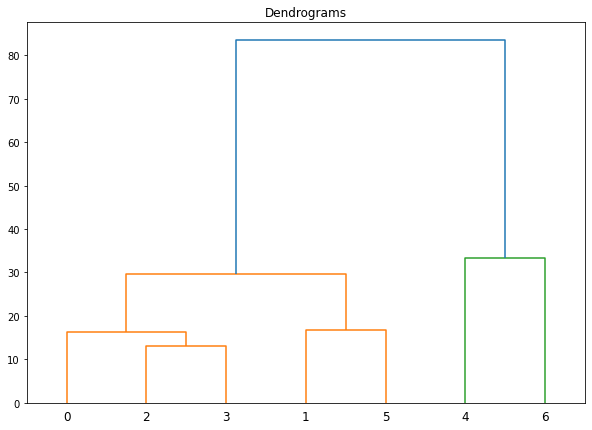

In [342]:
#Hierarchical Clustering Model fitting
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cust, method='complete'))

In [343]:
#importing library
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [344]:
model=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="complete",compute_distances=True)

In [347]:
model.fit(cust)

AgglomerativeClustering(compute_distances=True, linkage='complete')

In [348]:
model.labels_

array([1, 1, 1, 1, 0, 1, 0])

In [349]:
cust["Groups_Euclidean"]=model.labels_
cust

,Soap,Shampoo,Face_Wash,Chips,Rice,Groups_Euclidean
0,10,15,3,20,15,1
1,2,4,15,0,3,1
2,5,2,5,12,15,1
3,12,7,1,12,6,1
4,30,35,50,30,30,0
5,4,11,0,2,2,1
6,35,40,30,50,46,0


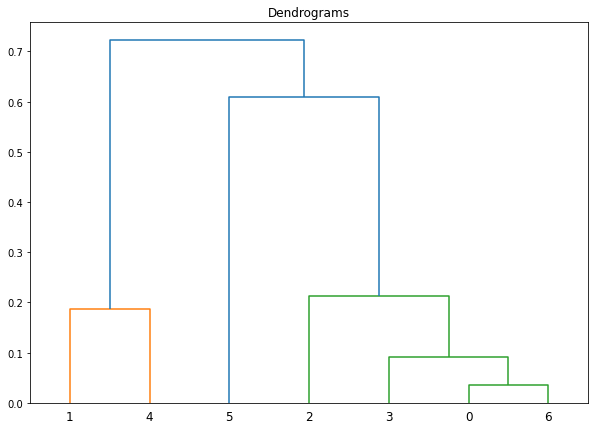

In [354]:
#Dendrogram for clustering based on cosine simialrity
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cust, method='complete',metric='cosine'))

In [355]:
#model initialization and fitting
modelnew=AgglomerativeClustering(n_clusters=2,affinity="cosine",linkage="complete",compute_distances=True)
modelnew.fit(cust)

AgglomerativeClustering(affinity='cosine', compute_distances=True,
                        linkage='complete')

In [351]:
#predicting labels
modelnew.labels_

array([0, 1, 0, 0, 1, 0, 0])

In [352]:
#creating copy of data
cust_new=cust.copy()

In [353]:
#inserting labels' column into original dataframe
cust_new["Groups_Cosine"]=modelnew.labels_
cust_new

,Soap,Shampoo,Face_Wash,Chips,Rice,Groups_Euclidean,Groups_Cosine
0,10,15,3,20,15,1,0
1,2,4,15,0,3,1,1
2,5,2,5,12,15,1,0
3,12,7,1,12,6,1,0
4,30,35,50,30,30,0,1
5,4,11,0,2,2,1,0
6,35,40,30,50,46,0,0


**INSIGHTS**

We observed that changing the metric to cosine similarity changed the clusters of the observations. Customers 1 and 4 were far away in terms of Euclidean distance, but displayed similar behaviour in terms of purchase preferences. Although they both were heavy and low buyers respectively, their similar tastes reflected in purchase patterns ended up putting them in the same group. This shows that two metrics, Euclidean distance and Cosine similarity, measure 'different kinds of similarity'. 

Interestingly, we also found that normalizing the data yielded same results for Cosine and Euclidean based clustering, inspite of trying the experiment about 15 times. We are still exploring why this may have happened.

**EXTRA:**

In [303]:
# compute cosine similarity
import numpy as np
from numpy.linalg import norm

def cosine(a,b):
  A=np.array(a)
  B=np.array(b)
  cosine = np.dot(A,B)/(norm(A)*norm(B))
  return("Cosine Similarity:", cosine)

In [304]:
C0=[10,15,3,20,15]
C1=[2,4,15,0,3]
C2=[5,2,5,12,15]
C3=[12,7,1,12,6]
C4=[30,35,50,30,30]
C5=[4,11,0,2,2]
C6=[35,40,30,50,46]

In [305]:
cosine(C4,C6)

('Cosine Similarity:', 0.9329858928640585)

In [306]:
cosine(C1,C4)

('Cosine Similarity:', 0.8141040494628548)

In [ ]:
)